In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('G:\Market Segmentation - Capstone 6\store.csv')

In [6]:
data.head(5)

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
reps       10000 non-null object
product    10000 non-null object
qty        10000 non-null int64
revenue    10000 non-null float64
region     10000 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [8]:
data.describe()

,qty,revenue
count,10000.000000,10000.000000
mean,3.387400,90.570221
std,4.318308,127.803928
min,1.000000,18.430000
25%,2.000000,39.300000
50%,2.000000,58.425000
75%,3.000000,75.000000
max,25.000000,1998.750000


In [9]:
data.apply(lambda x:len(x.unique()))

reps        72
product     12
qty         25
revenue    753
region       4
dtype: int64

In [10]:
# Exploratory analysis
# finding relationship between region and revenue

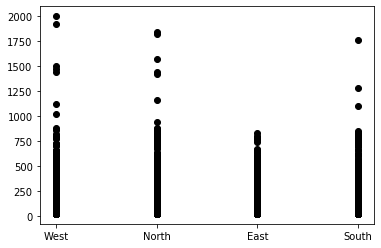

In [11]:
plt.scatter(data.region,data.revenue,c = 'black')

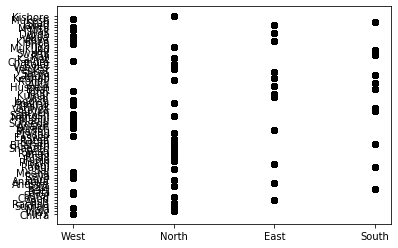

In [12]:
plt.scatter(data.region,data.reps,c = 'black')

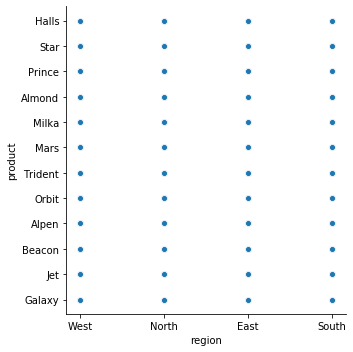

In [13]:
sns.relplot(x = 'region',y = 'product',data = data)

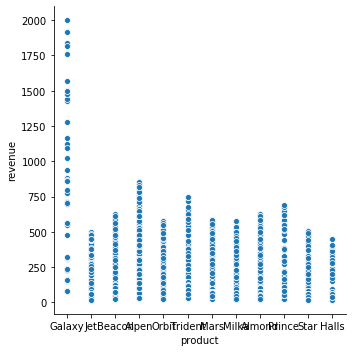

In [14]:
sns.relplot(x = 'product',y = 'revenue',data = data)

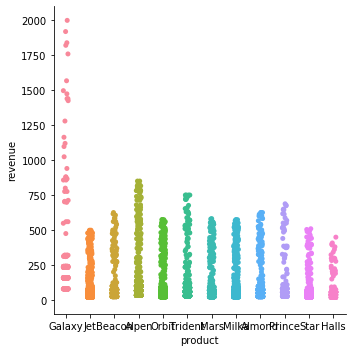

In [15]:
sns.catplot(x = 'product',y = 'revenue',data = data)

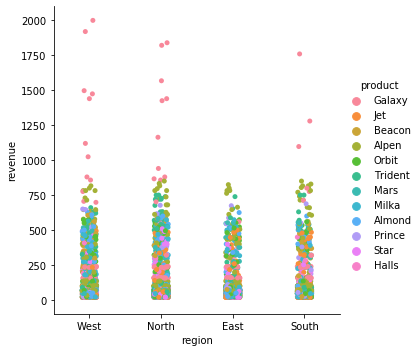

In [16]:
sns.catplot(x = 'region',y = 'revenue',hue = 'product',data = data)

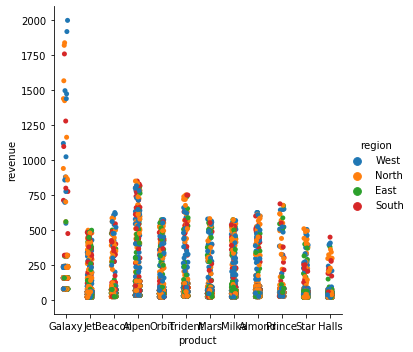

In [17]:
sns.catplot(x = 'product',y = 'revenue',hue = 'region',data = data)

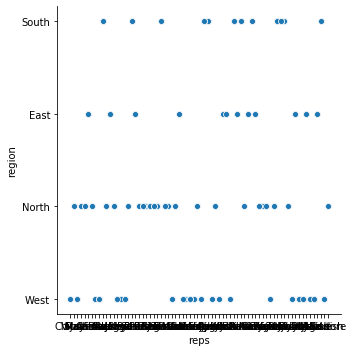

In [18]:
sns.relplot(x = 'reps',y = 'region',data = data)

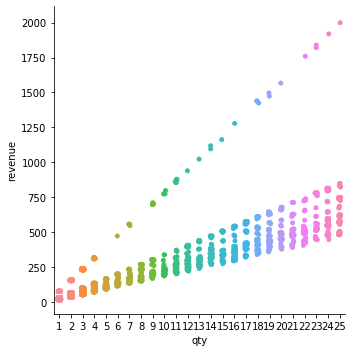

In [19]:
sns.catplot(x = 'qty',y = 'revenue',data = data)

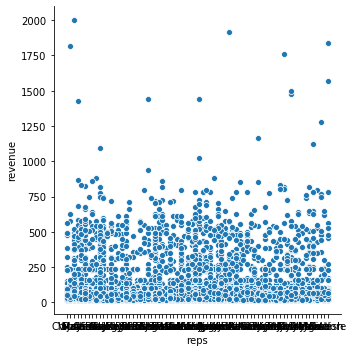

In [20]:
sns.relplot(x = 'reps',y = 'revenue',data = data)

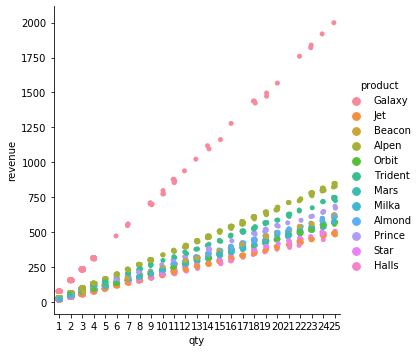

In [21]:
sns.catplot(x = 'qty',y = 'revenue',hue = 'product',data = data)

In [22]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
for col in categorical_columns:
    print (data[col].value_counts())

Seet       353
Santosh    318
Rachna     318
Aash       315
Vish       308
          ... 
Jay         84
Ram         84
Anusha      82
Sesh        81
Rohini      79
Name: reps, Length: 72, dtype: int64
Alpen      1588
Milka      1294
Jet        1274
Orbit      1255
Almond     1015
Trident     659
Star        652
Beacon      651
Mars        638
Galaxy      342
Prince      325
Halls       307
Name: product, dtype: int64
North    3603
West     3029
East     1703
South    1665
Name: region, dtype: int64


In [23]:
# Scaling region feature for visualization and kmeans clustering

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
data['product_scaled'] = le.fit_transform(data['product'])

In [26]:
data['region_scaled'] = le.fit_transform(data['region'])

In [27]:
data.head(10)

,reps,product,qty,revenue,region,product_scaled,region_scaled
0,Chitra,Galaxy,2,155.10,West,3,3
1,Vijay,Jet,2,39.30,North,5,1
2,Mala,Beacon,3,74.25,West,2,3
3,Suman,Alpen,3,100.98,North,1,1
4,Rachna,Orbit,2,44.98,North,8,1
5,Aash,Trident,1,29.25,East,11,0
6,Chand,Mars,3,68.39,North,6,1
7,Suraj,Orbit,2,45.44,West,8,3
8,Rachna,Milka,1,22.38,North,7,1
9,Bala,Almond,2,49.25,West,0,3


In [28]:
# Using aggreagate dunction for analysis and visualization 

In [29]:
# Groupby Products aggregating the corresponding revenuw and quantity values

In [30]:
data_revenue = data.groupby('product').agg({'revenue': 'sum','qty':'sum'})

In [31]:
data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Almond to Trident
Data columns (total 2 columns):
revenue    12 non-null float64
qty        12 non-null int64
dtypes: float64(1), int64(1)
memory usage: 288.0+ bytes


In [32]:
data_revenue

,revenue,qty
product,,
Almond,80581.91,3258
Alpen,177152.07,5267
Beacon,53164.41,2152
Galaxy,90919.18,1150
Halls,18211.18,969
Jet,84077.56,4262
Mars,58109.60,2498
Milka,94249.40,4153
Orbit,99284.25,4375


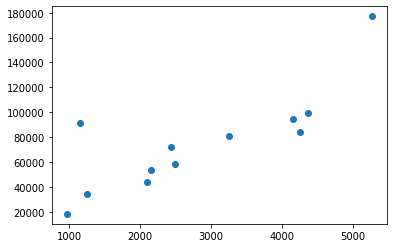

In [33]:
plt.scatter(data_revenue.qty,data_revenue.revenue)

In [34]:
#ax=data_revenue.plot()

In [35]:
# Groupby REgion values aggregating the corresponding revenue and quantity values

In [36]:
data_region = data.groupby('region').agg({'qty': 'sum','revenue':'sum'})

In [37]:
data_region

,qty,revenue
region,,
East,5614,146141.53
North,12174,326109.54
South,5908,158819.85
West,10178,274631.29


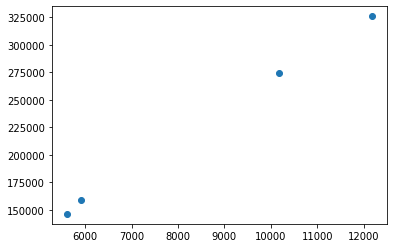

In [38]:
plt.scatter(data_region.qty,data_region.revenue)

In [39]:
# Exploratory Analysis Findings -
#1.The regions North and West have higher sales and revenue compared to South and EAst 
# 2. The sales of product Alpen is highest

In [40]:
# THe model
from sklearn.cluster import KMeans
X_qty = data_revenue[['qty','revenue']]

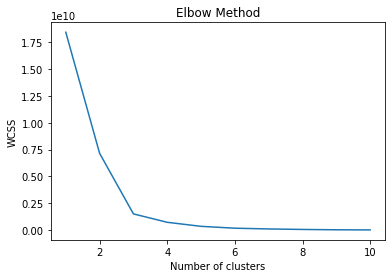

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_qty)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Using k value obtained from above illustrated elbow method

In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm = 'elkan')
pred_y = kmeans.fit_predict(X_qty)


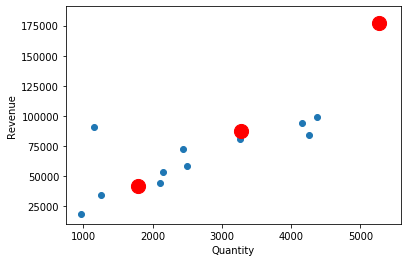

In [44]:
plt.scatter(data_revenue.qty,data_revenue.revenue)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=200, c='red')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

In [45]:
# k-means applied with region aggregated qty and revenue

In [48]:
X_region = data_region[['qty','revenue']]

In [50]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_region)

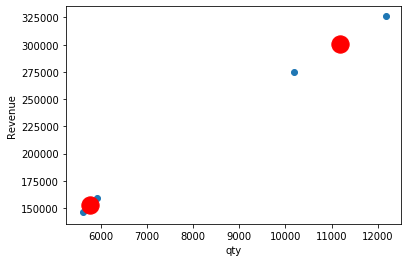

In [51]:

plt.scatter(X_region.qty,X_region.revenue)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('qty')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Findings
# 1. In the First case with the features qty and revenue we find the elbow point and get k = 3 find 3 clusters for segmenting the dataset
# 2. Int the second case with region and revenue features we get 2 clusters with south & east and North & west together